<a href="https://colab.research.google.com/github/karelcuevas/Actividades_Aprendizaje-/blob/main/Actividad_2_Equipo_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


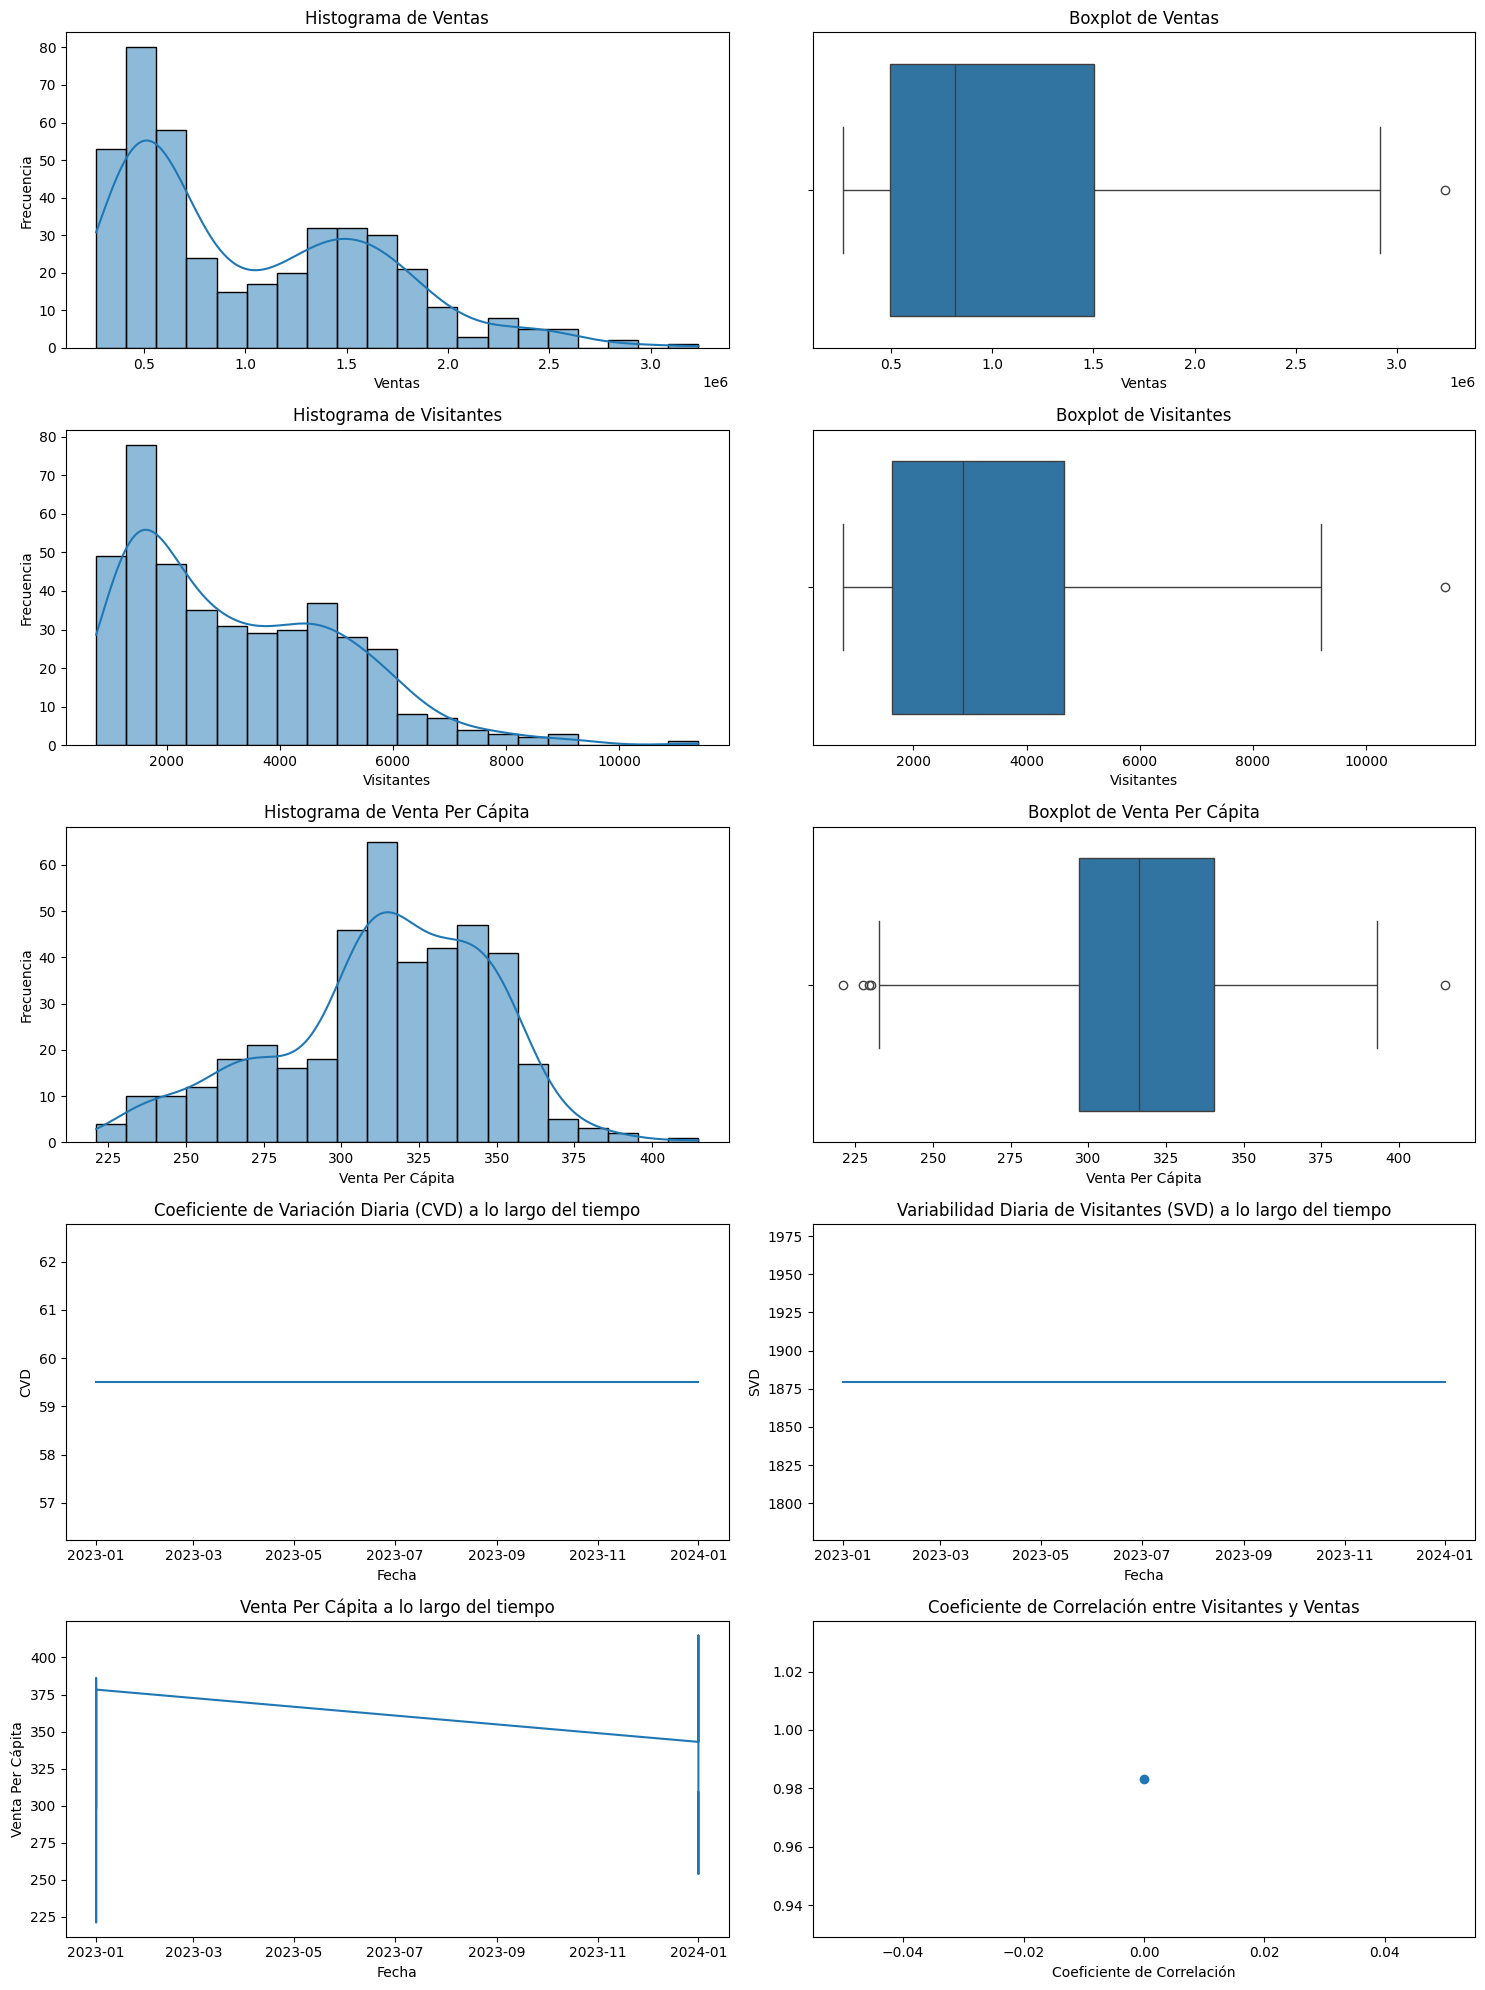

Análisis Estadístico:
           Percap    Visitantes         Venta
count  417.000000    417.000000  4.170000e+02
mean   313.769050   3272.666667  1.031330e+06
std     34.102264   1879.607629  6.137638e+05
min    221.055065    754.000000  2.634495e+05
25%    297.026481   1614.000000  4.969712e+05
50%    316.366543   2875.000000  8.182388e+05
75%    340.518556   4663.000000  1.502122e+06
max    414.876194  11396.000000  3.236131e+06

Coeficiente de Correlación entre Visitantes y Ventas:
0.9832211134923193


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo
file_path = "/content/Reporte de ventas operativo ver 4.0_Reporte de Ventas_Line chart.csv"

# Leer el archivo CSV
df = pd.read_csv(file_path, encoding='latin1', parse_dates=['Día'])

# Análisis estadístico
statistical_analysis = df.describe()

# Calcular indicadores
# Coeficiente de Variación Diaria (CVD)
df['MD'] = df['Venta'].mean()
df['SD'] = df['Venta'].std()
df['CVD'] = (df['SD'] / df['MD']) * 100

# Variabilidad Diaria de Visitantes (SVD)
df['MDV'] = df['Visitantes'].mean()
df['SDV'] = df['Visitantes'].std()

# Venta Per Cápita
df['Venta_Per_Capita'] = df['Venta'] / df['Visitantes']

# Coeficiente de Correlación
correlation_coef = df[['Visitantes', 'Venta']].corr().iloc[0, 1]

# Visualización de los indicadores
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Histograma para Ventas
sns.histplot(df['Venta'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de Ventas')
axes[0, 0].set_xlabel('Ventas')
axes[0, 0].set_ylabel('Frecuencia')

# Boxplot para Ventas
sns.boxplot(data=df, x='Venta', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Ventas')
axes[0, 1].set_xlabel('Ventas')

# Histograma para Visitantes
sns.histplot(df['Visitantes'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histograma de Visitantes')
axes[1, 0].set_xlabel('Visitantes')
axes[1, 0].set_ylabel('Frecuencia')

# Boxplot para Visitantes
sns.boxplot(data=df, x='Visitantes', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Visitantes')
axes[1, 1].set_xlabel('Visitantes')

# Histograma para Venta Per Cápita
sns.histplot(df['Venta_Per_Capita'], bins=20, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Histograma de Venta Per Cápita')
axes[2, 0].set_xlabel('Venta Per Cápita')
axes[2, 0].set_ylabel('Frecuencia')

# Boxplot para Venta Per Cápita
sns.boxplot(data=df, x='Venta_Per_Capita', ax=axes[2, 1])
axes[2, 1].set_title('Boxplot de Venta Per Cápita')
axes[2, 1].set_xlabel('Venta Per Cápita')

# Gráfico de línea para CVD
axes[3, 0].plot(df['Día'], df['CVD'])
axes[3, 0].set_title('Coeficiente de Variación Diaria (CVD) a lo largo del tiempo')
axes[3, 0].set_xlabel('Fecha')
axes[3, 0].set_ylabel('CVD')

# Gráfico de línea para SVD
axes[3, 1].plot(df['Día'], df['SDV'])
axes[3, 1].set_title('Variabilidad Diaria de Visitantes (SVD) a lo largo del tiempo')
axes[3, 1].set_xlabel('Fecha')
axes[3, 1].set_ylabel('SVD')

# Gráfico de línea para Venta Per Cápita
axes[4, 0].plot(df['Día'], df['Venta_Per_Capita'])
axes[4, 0].set_title('Venta Per Cápita a lo largo del tiempo')
axes[4, 0].set_xlabel('Fecha')
axes[4, 0].set_ylabel('Venta Per Cápita')

# Gráfico de dispersión para Coeficiente de Correlación
axes[4, 1].scatter(0, correlation_coef)
axes[4, 1].set_title('Coeficiente de Correlación entre Visitantes y Ventas')
axes[4, 1].set_xlabel('Coeficiente de Correlación')
axes[4, 1].set_ylabel('')

plt.tight_layout()
plt.show()

# Mostrar resultados
print("Análisis Estadístico:")
print(statistical_analysis)
print("\nCoeficiente de Correlación entre Visitantes y Ventas:")
print(correlation_coef)
